# **Predict Used Home Price in Chile**

### Create a model to predict used home prices in Región Metropolitana, Chile

## Context
El data set es el resultado de realizar un web scraping a una página web que contiene avisos de ventas de viviendas en Chile, y fue realizado con el fin de poder aprender su metodología.

## Content
Los datos que contiene son los valores de únicamente CASAS USADAS que se venden en la región metropolitana de Chile y que están publicado en el sitio web https://chilepropiedades.cl/ en la primera semana de mayo de 2020

El archivo contiene 1139 registros con las siguientes variables:
* Comuna de la región en la cual se encuentra la casa.
* Enlace al aviso de la vivienda.
* Tipo de vivienda.
* N_Habitaciones: Número de habitaciones.
* N_Baños: Número de baños.
* N_Estacionamientos: Número de estacionamientos.
* Total de superficie en mt2
* Superficie construida en mt2: metros de la construcción habitable.
* Valor en UF: valor en Unidades de fomentos de la propiedad declarado en el portal (hay avisos que no poseen este valor, por lo cual se generó según el valor de la UF al 2 ó 3 de mayo de 2020 - no lo recuerdo bien jejeje…). Más información sobre la UF en (español) https://es.wikipedia.org/wiki/Unidad_de_fomento (english) https://en.wikipedia.org/wiki/Unidad_de_Fomento
* Valor CLP: Valor en pesos chilenos.
* Dirección: dirección de la casa del aviso.
* Quién vende: Nombre de la persona que vende la vivienda.
* Corredor: Indica nombre de la empresa que vende.

## Source Data: 
https://www.kaggle.com/datasets/gorkigonzalez/casas-usadas-rm-chile-mayo-2020

## Credits:

User: https://www.kaggle.com/gorkigonzalez

#### **Import libraries**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### **Reading dataframe**

In [70]:
df = pd.read_excel('./data/Casas usadas - RM Mayo 2020.xlsx')

In [71]:
df.columns

Index(['Comuna', 'Link', 'Tipo_Vivienda', 'N_Habitaciones', 'N_Baños',
       'N_Estacionamientos', 'Total_Superficie_M2', 'Superficie_Construida_M2',
       'Valor_UF', 'Valor_CLP', 'Dirección', 'Quién_Vende', 'Corredor'],
      dtype='object')

### **Exploring Data Frame**

In [72]:
df.describe()

,N_Habitaciones,N_Baños,Total_Superficie_M2,Valor_UF,Valor_CLP
count,1131.000000,1118.000000,1102.000000,1139.000000,1.139000e+03
mean,4.109637,2.652952,866.097541,10218.017252,2.942870e+08
std,1.602654,1.394241,1845.360199,9652.728522,2.779984e+08
min,1.000000,1.000000,0.000000,1215.193389,3.500000e+07
25%,3.000000,2.000000,180.000000,3541.420735,1.020000e+08
50%,4.000000,2.000000,293.000000,6700.000000,1.929600e+08
75%,5.000000,3.000000,563.750000,13510.000000,3.890880e+08
max,19.000000,12.000000,30000.000000,70828.414693,2.040000e+09


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comuna                    1139 non-null   object 
 1   Link                      1139 non-null   object 
 2   Tipo_Vivienda             1139 non-null   object 
 3   N_Habitaciones            1131 non-null   float64
 4   N_Baños                   1118 non-null   float64
 5   N_Estacionamientos        1067 non-null   object 
 6   Total_Superficie_M2       1102 non-null   float64
 7   Superficie_Construida_M2  1103 non-null   object 
 8   Valor_UF                  1139 non-null   float64
 9   Valor_CLP                 1139 non-null   int64  
 10  Dirección                 1102 non-null   object 
 11  Quién_Vende               1139 non-null   object 
 12  Corredor                  1139 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 115.8+ KB


### **Missing Values**

<Axes: >

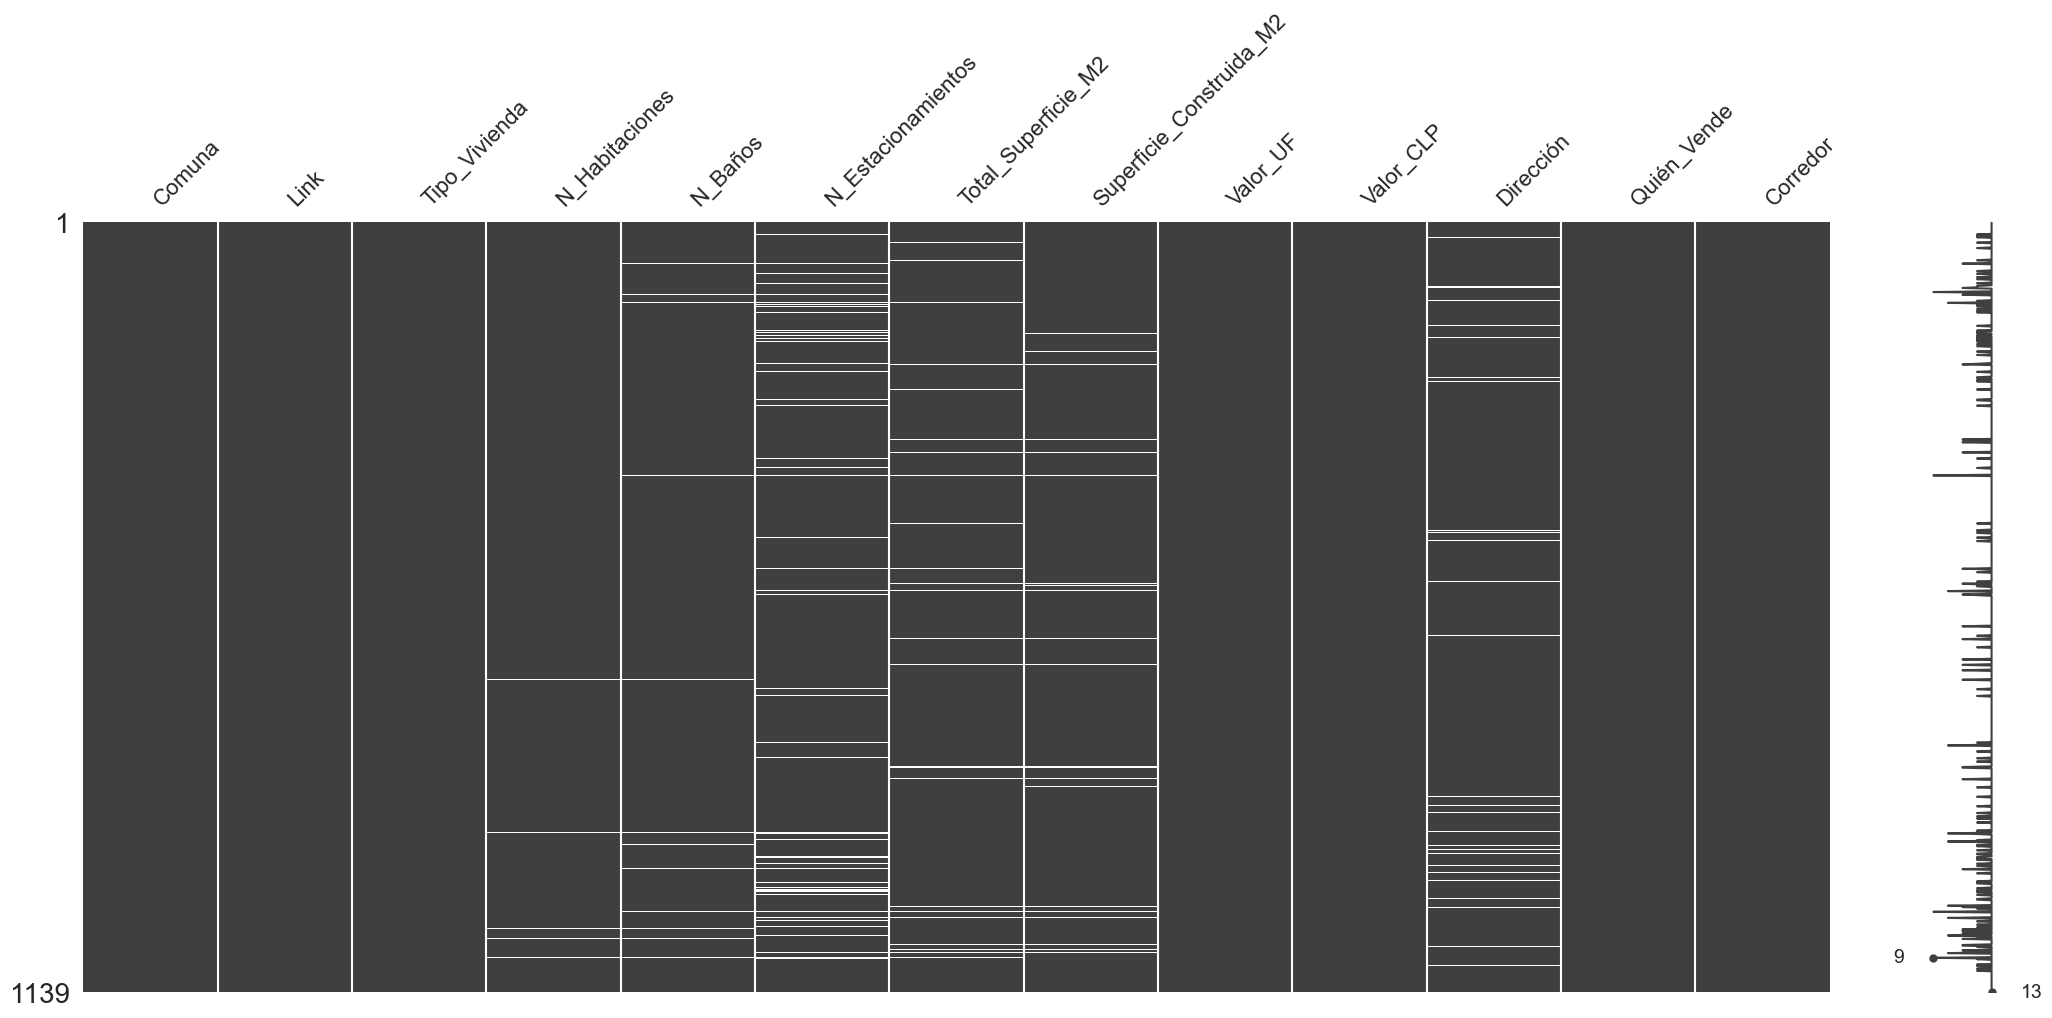

In [74]:
msno.matrix(df)

In [75]:
df.isnull().sum().sort_values(ascending=False)

N_Estacionamientos          72
Total_Superficie_M2         37
Dirección                   37
Superficie_Construida_M2    36
N_Baños                     21
N_Habitaciones               8
Comuna                       0
Link                         0
Tipo_Vivienda                0
Valor_UF                     0
Valor_CLP                    0
Quién_Vende                  0
Corredor                     0
dtype: int64

Podemos observar que la colunmna con el Número de estacionamiento posee la mayor cantidad de datos faltantes

We can look that "Número de estacionamientos" is the feature with the greatest amount of missing values

### **Dropping not relevant columns**
Vamos a eliminar algunas columnas para poder limpiar los datos y quitar aquellos que no sean relevantes

Feature called 'Tipo_Vivienda' has a unique value. This is a no sigificant feature to the model.

In [76]:
df.drop(['Tipo_Vivienda'], axis=1, inplace=True)

Feature called 'Link' is not relevant to the analysis.

Para nuestro modelo solo necesitamos datos numéricos

In [77]:
df.drop(['Link'], axis=1, inplace=True)

Feature called 'Dirección' is similar to an ID or index, and is not relevant to a numeric analysis.

La dirección termina siendo una especie de ID del registro por lo que no lo consideraremos relevante.

In [78]:
df.drop(['Dirección'], axis=1, inplace=True)

Feauture called 'Valor_UF' is similar to 'Valor_CLP and is not relevant to the model

Haremos los cálculos en Pesos por lo que la UF no se considera importante porque representa la misma información

In [79]:
df.drop(['Valor_UF'], axis=1, inplace=True)

### **Analysis about Feature called "Comuna" (it refers to Town or City)**

This an important feature because the mean price of houses can change between "Comunas". There are some "Comunas" that have a great income than other.

In [80]:
df["Comuna"].value_counts()

Comuna
Quilicura              50
Las Condes             50
Pudahuel               49
Ñuñoa                  49
Lo Barnechea           49
Vitacura               48
Providencia            48
Peñalolén              48
Maipú                  48
Santiago               47
Colina                 45
Puente Alto            45
La Reina               45
Lampa                  42
San Bernardo           41
Macul                  40
San Miguel             38
La Florida             29
Huechuraba             27
La Cisterna            25
Recoleta               25
Independencia          23
Conchalí               21
La Pintana             19
El Bosque              18
Peñaflor               17
Cerrillos              16
Padre Hurtado          15
Renca                  15
San Joaquín            14
Calera de Tango        14
Estación Central       13
La Granja              12
Pedro Aguirre Cerda    12
Quinta Normal          11
Lo Prado                9
Lo Espejo               8
San Ramón               5
El Mo

There is unbalanced amount of registries of the different "Comunas". By example, exists "Comunas" with only 3 rows and other with 50 rows.

In order to create only numeric features, in the next cells we'll create a new feature based on the Mean Price by "Comuna" and by Seller.

In [81]:
df["Valor_CLP"].value_counts()

Valor_CLP
85000000     19
95000000     17
65000000     17
80000000     15
150000000    14
             ..
662371200     1
671040000     1
420480000     1
662112000     1
572832000     1
Name: count, Length: 558, dtype: int64

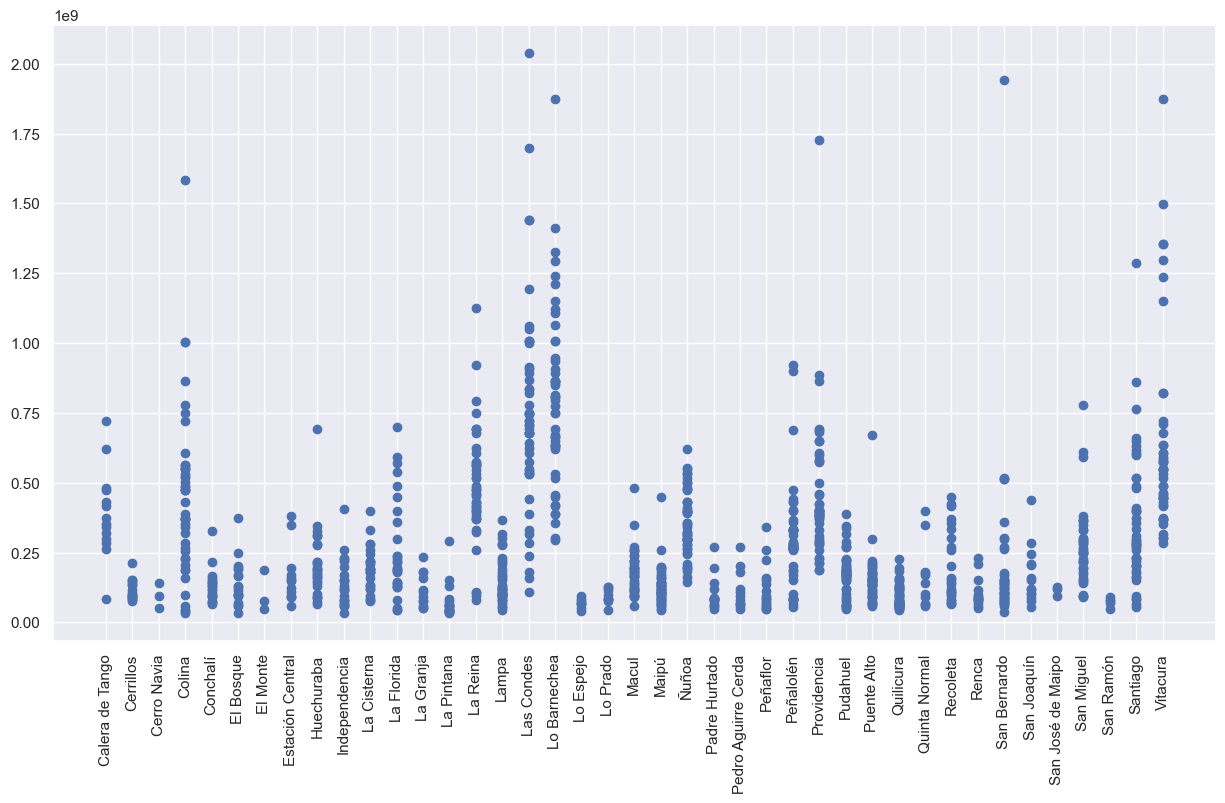

In [82]:
plt.scatter(x=df['Comuna'], y=df['Valor_CLP'])
plt.xticks(rotation=90)
plt.show()

## **Create new columns and drop columns**

Quién_Vende and Corredor are the same categorical info and they aren't relevant to the numeric analysis.

Instead we are going to create some new features.

Mean Price by Seller

Mean Price by Comuna (Town)

In [83]:
# Calculate mean price by Seller
names = []
mean_price = []
for name in df['Quién_Vende'].unique():
    names.append(name)
    mean_price.append(int(df[(df['Quién_Vende'] == name)].Valor_CLP.mean()))

dict_quien_vende = {'Names_Quien_Vende': names, 'Mean_Prices': mean_price}
df_quien_vende = pd.DataFrame(dict_quien_vende)


# Add a new column with the mean price
mean_prices_by_seller = []

for name in list(df['Quién_Vende'].values):
    index = list(df_quien_vende['Names_Quien_Vende'].values).index(name)
    mean_prices_by_seller.append(df_quien_vende['Mean_Prices'][index])

df['Mean_Price_by_Seller'] = mean_prices_by_seller


Eliminate Quién_Vende and Corredor

In [84]:
df.drop(['Quién_Vende', 'Corredor'], axis=1, inplace=True)
df

,Comuna,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie_M2,Superficie_Construida_M2,Valor_CLP,Mean_Price_by_Seller
0,Calera de Tango,5.0,6.0,3,5000.0,440,351360000,330720000
1,Calera de Tango,6.0,6.0,6,5000.0,430,374400000,330720000
2,Calera de Tango,3.0,3.0,No,2027.0,140,296640000,640570000
3,Calera de Tango,8.0,6.0,No,5000.0,480,619200000,297978258
4,Calera de Tango,3.0,2.0,3,5000.0,196,262080000,330720000
...,...,...,...,...,...,...,...,...
1134,Vitacura,4.0,3.0,No,389.0,211,576000000,510460556
1135,Vitacura,3.0,2.0,No,325.0,120,633600000,773160000
1136,Vitacura,6.0,3.0,No,638.0,242,573120000,297978258
1137,Vitacura,5.0,3.0,No,338.0,230,532800000,297978258


In [85]:
# Calculate mean price by Comuna
comunas = []
mean_price = []
for comuna in df['Comuna'].unique():
    comunas.append(comuna)
    mean_price.append(int(df[(df['Comuna'] == comuna)].Valor_CLP.mean()))

dict_comunas = {'Comunas': comunas, 'Mean_Prices': mean_price}
df_comunas = pd.DataFrame(dict_comunas)


# Add a new column with the mean price
mean_prices_by_comuna = []

for comuna in list(df['Comuna'].values):
    index = list(df_comunas['Comunas'].values).index(comuna)
    mean_prices_by_comuna.append(df_comunas['Mean_Prices'][index])

df['Mean_Price_by_Comuna'] = mean_prices_by_comuna

Drop "Comuna" Column

In [86]:
df.drop(['Comuna'], axis=1, inplace=True)

In [87]:
df.dropna(axis=0, inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1138
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Habitaciones            1023 non-null   float64
 1   N_Baños                   1023 non-null   float64
 2   N_Estacionamientos        1023 non-null   object 
 3   Total_Superficie_M2       1023 non-null   float64
 4   Superficie_Construida_M2  1023 non-null   object 
 5   Valor_CLP                 1023 non-null   int64  
 6   Mean_Price_by_Seller      1023 non-null   int64  
 7   Mean_Price_by_Comuna      1023 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 71.9+ KB


Change the value "No" in "N_Estacionamientos" to 0

In [89]:
def no_to_0(value):
    if value == 'No':
        value = 0
    return value

N_Estacionamientos = df.N_Estacionamientos.apply(lambda x: no_to_0(x))

In [90]:
df.N_Estacionamientos = N_Estacionamientos

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1138
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Habitaciones            1023 non-null   float64
 1   N_Baños                   1023 non-null   float64
 2   N_Estacionamientos        1023 non-null   int64  
 3   Total_Superficie_M2       1023 non-null   float64
 4   Superficie_Construida_M2  1023 non-null   object 
 5   Valor_CLP                 1023 non-null   int64  
 6   Mean_Price_by_Seller      1023 non-null   int64  
 7   Mean_Price_by_Comuna      1023 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 71.9+ KB


Change Superficie_Construida_M2  to int

In [92]:
df.Superficie_Construida_M2 = df.Superficie_Construida_M2.astype("int64")

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1138
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Habitaciones            1023 non-null   float64
 1   N_Baños                   1023 non-null   float64
 2   N_Estacionamientos        1023 non-null   int64  
 3   Total_Superficie_M2       1023 non-null   float64
 4   Superficie_Construida_M2  1023 non-null   int64  
 5   Valor_CLP                 1023 non-null   int64  
 6   Mean_Price_by_Seller      1023 non-null   int64  
 7   Mean_Price_by_Comuna      1023 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 71.9 KB


In [94]:
df.N_Estacionamientos.value_counts()

N_Estacionamientos
0     591
2     164
1     106
3      73
4      45
8      17
5      13
6      10
7       3
10      1
Name: count, dtype: int64

Plot distribution of data

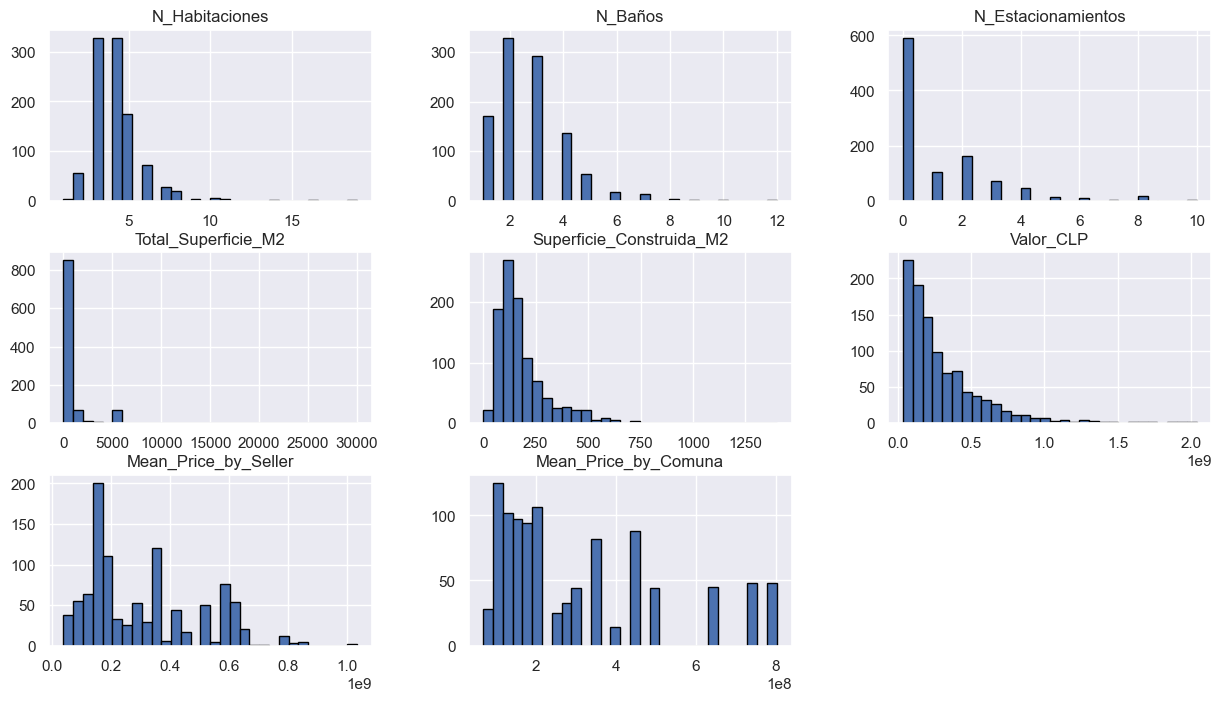

In [95]:
df.hist(figsize=(15,8), bins=30, edgecolor='black')
plt.show()

Plot correlation

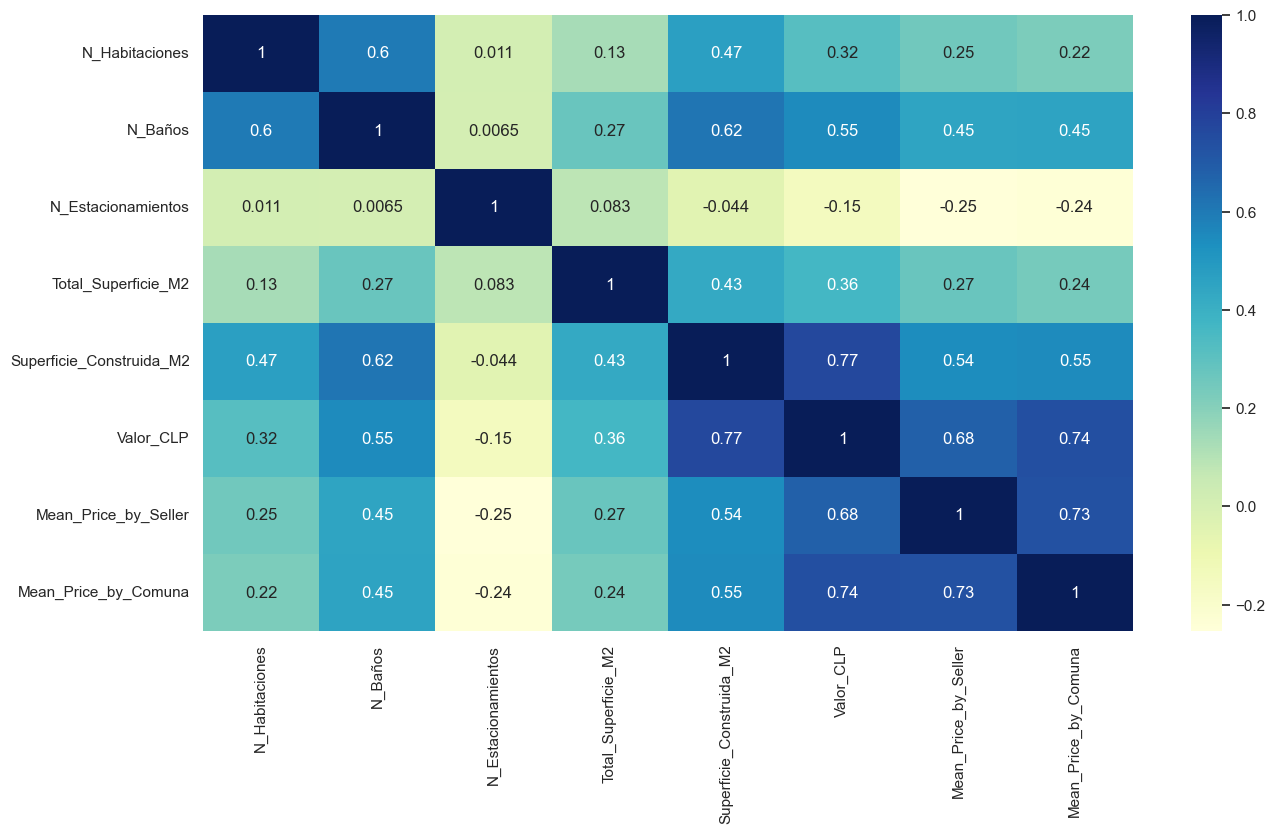

In [96]:
sns.set(rc={'figure.figsize': (15,8)})
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [97]:
df.columns

Index(['N_Habitaciones', 'N_Baños', 'N_Estacionamientos',
       'Total_Superficie_M2', 'Superficie_Construida_M2', 'Valor_CLP',
       'Mean_Price_by_Seller', 'Mean_Price_by_Comuna'],
      dtype='object')

## **Models without scaling data**

In [98]:
# Separate between X and y
X_all_ft = df.drop(['Valor_CLP'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_all_ft, target, test_size=.2)


# Model
from sklearn.linear_model import LinearRegression
model_a = LinearRegression()
model_a.fit(X_train, target_train)

# Scores
print('Scores')
print(model_a.score(X_train, target_train))
print(model_a.score(X_test, target_test))

# Predicting
predictions = model_a.predict(X_test)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7399737601272267
0.7825950302301206


,Prediction,Actual value
518,3.751643e+07,85000000
1027,2.901252e+08,365760000
1070,2.832272e+08,400000000
772,2.019540e+08,270720000
327,2.199890e+08,192000000
...,...,...
423,5.833841e+08,357120000
686,4.026210e+08,330000000
996,1.019550e+08,106000000
812,1.494681e+08,126467120


In [99]:
# Separate between X and y
X_ = df.drop(['Valor_CLP', 'N_Estacionamientos'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_, target, test_size=.2)

# Model
from sklearn.linear_model import LinearRegression
model_b = LinearRegression()
model_b.fit(X_train, target_train)

# Scores
print('Scores')
print(model_b.score(X_train, target_train))
print(model_b.score(X_test, target_test))

# Predicting
predictions = model_b.predict(X_test)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7649176983477239
0.6567705013235483


,Prediction,Actual value
837,1.435514e+08,158444000
1098,6.037290e+08,463680000
91,1.333930e+08,95000000
863,2.092371e+07,53000000
104,1.875623e+08,200000000
...,...,...
737,4.335336e+08,385920000
1029,2.768367e+08,260000000
276,4.685789e+08,691200000
277,7.607812e+08,570240000


In [100]:
# Separate between X and y
X_0 = df.drop(['Valor_CLP', 'N_Estacionamientos', 'N_Habitaciones'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_0, target, test_size=.2)

# Model
from sklearn.linear_model import LinearRegression
model_c = LinearRegression()
model_c.fit(X_train, target_train)

# Scores
print('Scores')
print(model_c.score(X_train, target_train))
print(model_c.score(X_test, target_test))

# Predicting
predictions = model_c.predict(X_test)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7473809635038433
0.7319217743523025


,Prediction,Actual value
748,1.577356e+08,154080000
508,1.723506e+08,185000000
853,7.861603e+07,64500000
434,9.296494e+08,748800000
490,9.153461e+07,90000000
...,...,...
1091,4.513369e+08,432000000
922,1.029050e+08,67000000
37,9.174361e+08,1584000000
568,4.158363e+08,518400000


In [101]:
# Separate between X and y
X_1 = df.drop(['Valor_CLP', 'N_Estacionamientos', 'N_Habitaciones', 'Total_Superficie_M2'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_1, target, test_size=.2)

# Model
from sklearn.linear_model import LinearRegression
model_d = LinearRegression()
model_d.fit(X_train, target_train)

# Scores
print('Scores')
print(model_d.score(X_train, target_train))
print(model_d.score(X_test, target_test))

# Predicting
predictions = model_d.predict(X_test)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7715051681284102
0.6698254789940746


,Prediction,Actual value
525,1.019770e+08,116640000
1121,7.897492e+08,1296000000
758,7.635947e+07,60000000
999,1.805101e+08,127000000
497,1.406103e+08,113000000
...,...,...
443,1.059303e+09,1410912000
764,1.907561e+08,102000000
786,1.750464e+08,167040000
929,4.128399e+07,59000000


## **Creating models with scaled data**

In [102]:
# Separate between X and y
X = df.drop(['Valor_CLP'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=.2)

# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model
from sklearn.linear_model import LinearRegression
model_e = LinearRegression()
model_e.fit(X_train_scaled, target_train)

# Scores
print('Scores')
print(model_e.score(X_train_scaled, target_train))
print(model_e.score(X_test_scaled, target_test))

# Predicting
predictions = model_e.predict(X_test_scaled)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7815567101517192
0.6476438632502239


,Prediction,Actual value
768,1.724315e+08,187200000
525,1.111848e+08,116640000
802,8.151714e+07,70000000
669,2.949935e+08,288000000
1104,5.680841e+08,518400000
...,...,...
73,7.259852e+08,500832000
505,2.640707e+08,260000000
527,1.688956e+08,160000000
880,8.425319e+07,93000000


In [103]:
# Separate between X and y
X_ = df.drop(['Valor_CLP','N_Estacionamientos'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_, target, test_size=.2)

# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model
from sklearn.linear_model import LinearRegression
model_f = LinearRegression()
model_f.fit(X_train_scaled, target_train)

# Scores
print('Scores')
print(model_f.score(X_train_scaled, target_train))
print(model_f.score(X_test_scaled, target_test))

# Predicting
predictions = model_f.predict(X_test_scaled)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7275430382639145
0.8239798805214512


,Prediction,Actual value
750,1.555903e+08,176256000
655,3.405215e+08,330000000
399,5.083227e+08,285000000
680,3.773029e+08,183312304
810,1.503632e+08,298000000
...,...,...
664,2.597485e+08,280000000
112,1.574728e+08,63000000
1071,4.828412e+08,290000000
760,1.709207e+08,195840000


In [104]:
# Separate between X and y
X_0 = df.drop(['Valor_CLP','N_Estacionamientos', 'N_Habitaciones'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_0, target, test_size=.2)

# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model
from sklearn.linear_model import LinearRegression
model_g = LinearRegression()
model_g.fit(X_train_scaled, target_train)

# Scores
print('Scores')
print(model_g.score(X_train_scaled, target_train))
print(model_g.score(X_test_scaled, target_test))

# Predicting
predictions = model_g.predict(X_test_scaled)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7302419924432044
0.8113642185419043


,Prediction,Actual value
1005,2.457558e+08,350000000
778,1.135518e+08,75000000
38,3.856955e+08,187200000
591,2.591997e+08,281664000
306,4.611874e+08,417600000
...,...,...
248,2.125303e+08,180000000
894,1.678604e+08,100000000
542,1.506846e+08,140000000
882,8.122246e+07,131040000


In [105]:
# Separate between X and y
X_1 = df.drop(['Valor_CLP','N_Estacionamientos', 'N_Habitaciones', 'Total_Superficie_M2'], axis=1)
target = df['Valor_CLP']

# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X_1, target, test_size=.2)

# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model
from sklearn.linear_model import LinearRegression
model_h = LinearRegression()
model_h.fit(X_train_scaled, target_train)

# Scores
print('Scores')
print(model_h.score(X_train_scaled, target_train))
print(model_h.score(X_test_scaled, target_test))

# Predicting
predictions = model_h.predict(X_test_scaled)
comparison = {'Prediction': predictions, 'Actual value': target_test}
pd.DataFrame(comparison)

Scores
0.7388057639977061
0.7529560574857219


,Prediction,Actual value
478,2.244079e+08,190000000
963,2.046566e+08,100000000
127,3.320386e+07,110000000
918,4.315906e+08,302400000
1086,1.829686e+08,175000000
...,...,...
1113,6.089836e+08,604800000
1026,2.285732e+08,331200000
225,1.643485e+08,187200000
952,2.121748e+08,149000000


## **Results**

The best score's model was without'N_Estacionamientos' feature and with scaled data.

To obtain the best scores, we need to acquire more data and by modifying hyperparameters.

### Export Model

In [108]:
import pickle

# Load the trained model
model = model_f

# Save the model to a file
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)